<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/clusters_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# File Loading

In [109]:
data_url = 'https://raw.githubusercontent.com/bobg207/Honors_Data_Analysis/master/driving_clustering_data.txt'

driving_df = pd.read_csv(data_url, delim_whitespace=True)

# Better Column Names

In [110]:
driving_df.columns = ['id', 'dist', 'speed']
driving_df.head()

,id,dist,speed
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


# Normalize Data

In [111]:
driving_df['norm dist'] = (driving_df.dist - driving_df.dist.mean())/driving_df.dist.std()
driving_df['norm speed'] = (driving_df.speed - driving_df.speed.mean())/driving_df.speed.std()
driving_df.head(10)

,id,dist,speed,norm dist,norm speed
0,3423311935,71.24,28.0,-0.089799,1.260455
1,3423313212,52.53,25.0,-0.439718,1.041613
2,3423313724,64.54,27.0,-0.215104,1.187508
3,3423311373,55.69,22.0,-0.380619,0.822772
4,3423310999,54.58,25.0,-0.401378,1.041613
5,3423313857,41.91,10.0,-0.638336,-0.052595
6,3423312432,58.64,20.0,-0.325447,0.676877
7,3423311434,52.02,8.0,-0.449256,-0.198489
8,3423311328,31.25,34.0,-0.837701,1.698138
9,3423312488,44.31,19.0,-0.593450,0.603930


# Visuals

<AxesSubplot:xlabel='norm dist', ylabel='norm speed'>

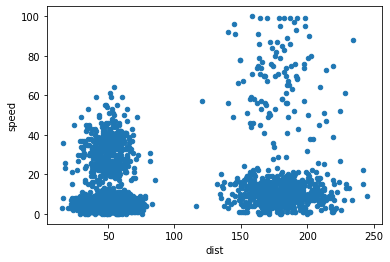

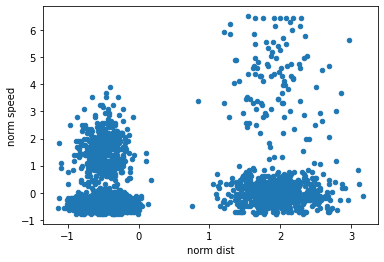

In [112]:
driving_df.plot(x='dist', y='speed', kind='scatter')
driving_df.plot(x='norm dist', y='norm speed', kind='scatter')

# Centroids

[[-0.5, -0.8], [1.9, 0]] 2
[(-0.4870736569220013, -0.1506056018077174), (1.909352699397813, 0.5903813689559587)]
[(-0.4858438049274572, -0.1405466164453711), (1.940342486845118, 0.5613091460783272)]
[(-0.48575492308718204, -0.1381444088649313), (1.9460594603280017, 0.553442118619077)]
[(-0.48575492308718204, -0.1381444088649313), (1.9460594603280017, 0.553442118619077)]


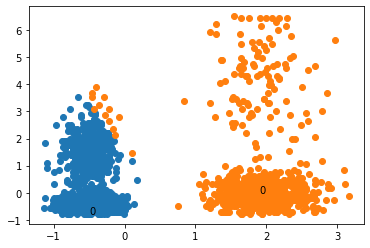

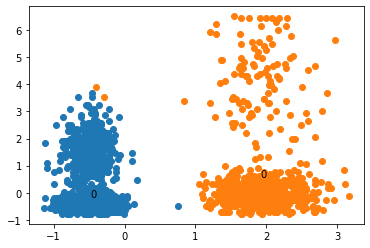

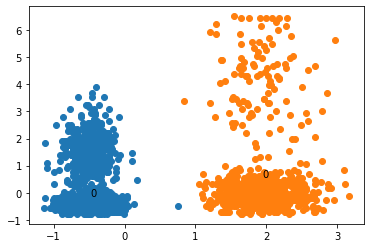

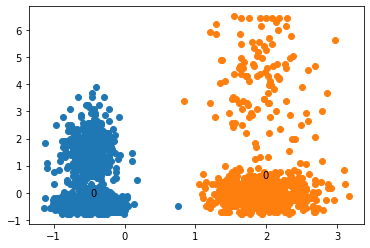

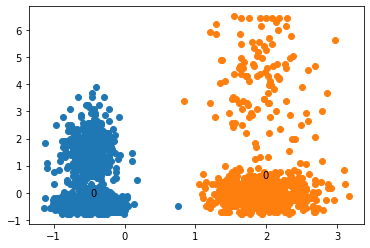

In [115]:
guesses_1 = [[-0.5, -0.8], [1.9, 0]]
def graphing_steps(frame, col1, col2, index1, cen1):
  cluster_1_x = frame[col1].iloc[index1]
  cluster_1_y = frame[col2].iloc[index1]

  plt.scatter(cluster_1_x, cluster_1_y)
  plt.text(cen1[0], cen1[1], '0')

def find_cens(frame, xcol, ycol, index):
  x = frame[xcol].iloc[index]
  y = frame[ycol].iloc[index]
  length_x = len(x)
  length_y = len(y)

  added = 0
  for value in x:
    added += value
  divide = len(x)
  xc = added / divide

  added = 0
  for value in y:
    added += value
  divide = len(y)
  yc = added / divide
  return xc, yc

def clusters(cens, frame, col1, col2):
  num_points = len(frame[col1])
  num_clust = len(cens)
  x = frame[col1]
  y = frame[col2]
  print(cens, num_clust)
  # print(num_points)
  # print(num_clust)
  # print(x)

  for val in range(4):
    clusters = [[] for cluster in range(num_clust)]
    for np in range(num_points):
      dist_min = math.inf
      for nc in range(num_clust):
        dist = (cens[nc][0] - x[np])**2 + (cens[nc][1] - y[np])**2
        if dist < dist_min:
          dist_min = dist
          cluster_num = nc
      clusters[cluster_num].append(np)
    plt.figure()
    for index in range(num_clust):
      graphing_steps(frame, col1, col2, clusters[index], cens[index])
    for index in range(num_clust):
      cens[index] = find_cens(frame, col1, col2, clusters[index])
    print(cens)
  plt.figure()
  for index in range(num_clust):
      graphing_steps(frame, col1, col2, clusters[index], cens[index])
  return clusters

clusts_2 = clusters(guesses_1, driving_df, 'norm dist', 'norm speed')

[[-0.5, -0.8], [2, -0.3], [-0.6, 1.5], [2, 3.5]] 4
[(-0.4872899588754828, -0.40706868061346707), (1.948665019772805, -0.02863109558648504), (-0.4789908645025336, 1.5406910556230526), (1.9186434864742792, 4.233890473365141)]
[(-0.48672337346682953, -0.4024470487234186), (1.9523881584661986, -0.013969654018110522), (-0.47964713502444956, 1.5734772434959348), (1.881814736984727, 4.340911590210173)]
[(-0.48672337346682953, -0.4024470487234186), (1.9523881584661986, -0.013969654018110522), (-0.47946339766998436, 1.578894286609148), (1.903766717962155, 4.345280406915675)]
[(-0.48672337346682953, -0.4024470487234186), (1.9523881584661986, -0.013969654018110522), (-0.47946339766998436, 1.578894286609148), (1.903766717962155, 4.345280406915675)]


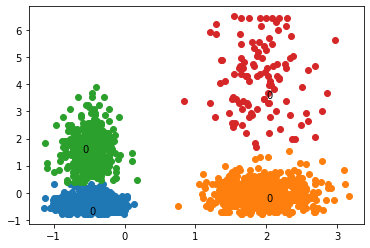

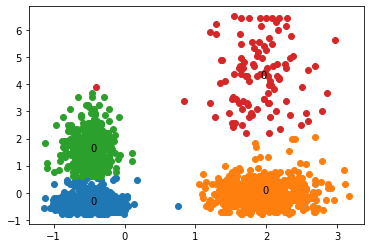

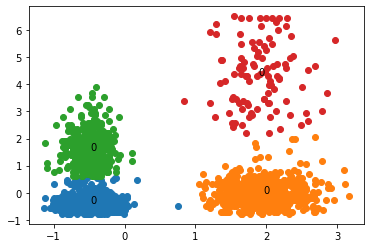

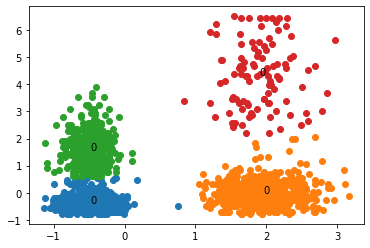

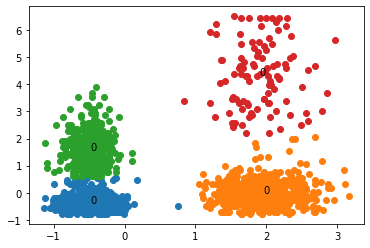

In [116]:
guesses_2 = [[-0.5, -0.8], [2, -0.3], [-0.6, 1.5], [2, 3.5]]
clusts_4 = clusters(guesses_2, driving_df, 'norm dist', 'norm speed')